In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')
my_colors = [u'#1f77b4',
 u'#ff7f0e',
 u'#2ca02c',
 u'#d62728',
 u'#9467bd',
 u'#8c564b',
 u'#e377c2',
 u'#7f7f7f',
 u'#bcbd22',
 u'#17becf',
 u'#f2f2f2',            
 u'#fffa00',
 u'#000000',
 u'#b6ff9b',
 u'#005400',
 u'#ffc28c',
 u'#d69c68',
 u'#c1c1c1',
 u'#fbccff',
 u'#ff5e5e',
 u'#00edb2',
 u'#ffca1e',
 u'#933f3f']

In [29]:
df = pd.read_csv("11_genomes_mapping_individual_id_per.csv",index_col=0)
df["% identity"] = (df["% identity"]/2).astype(int) *2 # use 2 as bin

df1 = pd.DataFrame(df.groupby(["genome ID","MetaG ID","% identity"])["% reads of mapped reads"].sum()).reset_index()
df2 = df1["MetaG ID"].copy()

In [27]:
#df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-113","072115-113\nrhizosphere_July")
#df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-104","072115-104\nrhizosphere_July")
#df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-40","072115-40\nroot_July")
#df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-129","072115-129\nrhizosphere_July")
#df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-187","072115-187\nsoil_July")
#df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-103","072115-103\nrhizosphere_July")

In [34]:
df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-113","072115-N-103\nrhizosphere_July")
df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-104","072115-N-104\nrhizosphere_July")
df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-40","072115-N-113\nrhizosphere_July")
df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-129","072115-N-129\nrhizosphere_July")
df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-187","072115-N-187\nsoil_July")
df1["MetaG ID"] = df1["MetaG ID"].str.replace("072115-103","072115-N-40\nroot_July")
df1["MetaG ID"] = df1["MetaG ID"].str.replace("-N","")

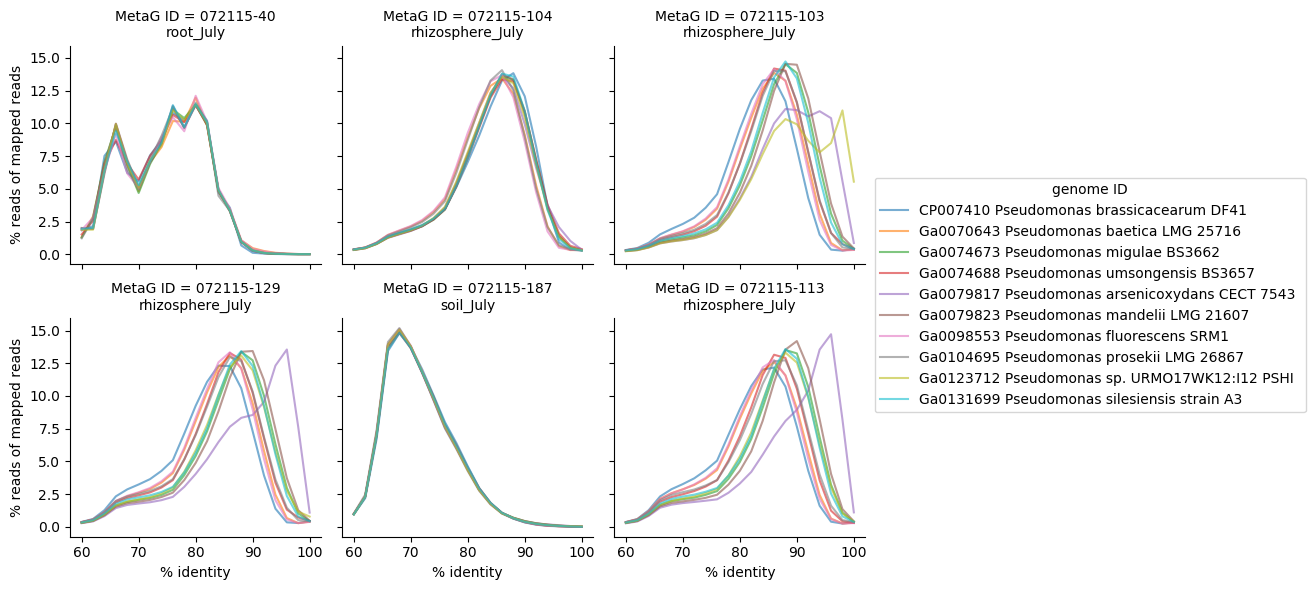

In [35]:
sns.set_palette(my_colors)
g = sns.FacetGrid(data=df1, col='MetaG ID',col_wrap=3, hue='genome ID')
sns_plot = (g.map(plt.plot, '% identity','% reads of mapped reads',alpha=0.6)).add_legend()
#for ax in sns_plot.axes.flat:  #show x axis for all
    #for a in ax.get_xticklabels():
        #a.set_visible(True)

sns_plot.savefig("/Users/jzz0026/Google_superjohnlove/JGI projects/Sorgumn root microbe project/11g_sep_mapping_against_iden_plot.png")